In [2]:
using DataFrames
using DataFramesMeta
using CSV
using SavitzkyGolay
using Plots
using CurveFit

In [3]:
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\WDM\\RAV16\\Plates\\LONG-PM-NS-R1_R16_230302151337_S2_LP.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\WDM\\RAV16\\Plates\\LONG-PM-NS-R1_R16_230302151337_S5_LP.dat", DataFrame, missingstring="")
#df = CSV.read("\\Users\\royj\\development\\LONG-PM-NS-R1_R09_230302094024_S1_TEX.dat",DataFrame)
#df = CSV.read("\\\\trllimited\\data\\INF_TRACS\\TRACS5\\1 - Accreditation\\RAV17\\5-Accreditation-May23\\CC Output\\TRACS4\\Plates\\Texture\\RAV17_NS_Run_1_A.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\PTS\\MFV1 resubmission\\ProfileMats\\LONG-PM-NS-R2_rcd_AB1_tex.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\PTS\\MFV2 sumbission2\\ProfileMats\\LONG-PM-NS-R1_AB1_tex.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\PTS\\MFV2 sumbission2\\ProfileMats\\LONG-PM-NS-R1_AB1_tex.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\G-L\\Tempest4\\PM_Long\\NS\\T4_20230524_094145_GLUK_RCD_L1AB_tex.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\G-L\\Tempest3\\PM_Long\\NS\\T3_20230524_094200_GLUK_RCD_tex.dat", DataFrame)

In [17]:
using Gtk

file_to_load = open_dialog_native("Select Long. Prof. data file", GtkNullContainer(), String[])


"\\\\trllimited\\data\\INF_TRACS\\TRACS5\\1 - Accreditation\\RAV18\\7-Accrediation-April24\\4-ChartCrack Outputs\\A329m\\First Supply - TRACS4\\Lane 1\\2024_TRR1_R1_R18_240416132747_tracs5_PrimaryAudit_10.aud"

In [5]:
using CSV
#df = CSV.File(file_to_load, delim=",", header=1, select=[:Chainage,:var"NS LP"]) |> DataFrame

df = CSV.read(file_to_load
                , DataFrame
                , silencewarnings=true
                , missingstring=["","-999.9000","-9999","-9999.000", "-9999.00", "-9999.0", "N/A"]
                )


Row,CHARTCrack Primary Check Results,3.00.01Beta,\\\\trllimited\\data\\INF_TRACS\\TRACS5\\1 - Accreditation\\RAV18\\7-Accrediation-April24\\2-Raw Data\\A329m\\Lane 1\\2024_TRR1_R3_R18_240416141645\\2024_TRR1_R3_R18_240416141645_tracs5.bcd,16-apr-2024,14:16,16-apr-2024_1,15:38,27880.116,2024_TRR1_R3_R18_240416141645,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Column36,Column37,Column38,Column39,Column40,Column41,Column42,Column43,Column44,Column45,Column46,Column47,Column48,Column49,Column50,Column51,Column52,Column53,Column54,Column55,Column56,Column57,Column58,Column59,Column60,Column61,Column62,Column63,Column64,Column65,Column66,Column67,Column68,Column69,Column70,Column71,Column72,Column73,Column74,Column75,Column76,Column77,Column78,Column79,Column80,Column81,Column82,Column83,Column84,Column85,Column86,Column87,Column88,Column89,Column90,Column91,Column92,Column93,Column94,Column95,Column96,Column97,Column98,Column99,Column100,⋯
,String,String?,String31?,String15?,String15?,String15?,String?,String?,String?,String?,String?,String?,String15?,String31?,String15?,String31?,String31?,String15?,String15?,String15?,String15?,String15?,String15?,String15?,String15?,String15?,String15?,String15?,String15?,String15?,String15?,String15?,String?,String15?,String31?,String31?,String31?,String?,String31?,String31?,String31?,String31?,String31?,String31?,String31?,String31?,String31?,String31?,String31?,String31?,String31?,String15?,String15?,String31?,String31?,String15?,String31?,String15?,String31?,String15?,String31?,String15?,String31?,String15?,String31?,String31?,String31?,String15?,String15?,String31?,String31?,String15?,String15?,String31?,String31?,String15?,String15?,String31?,String31?,String15?,String15?,String31?,String31?,String15?,String15?,String15?,String15?,String15?,String15?,String15?,String15?,String15?,String15?,String15?,String15?,String?,String?,String31?,String31?,String31?,⋯
1,Ref Section ID,Section,Chainage,Easting(m),Northing(m),Altitude(m),Crack on a bituminous surface (m2),Transverse joint on a bituminous surface (m2),Longitudinal joint on a bituminous surface (m2),Crack on a concrete surface (m2),Transverse joint on a concrete surface (m2),Longitudinal Joint on a concrete surface (m2),Fretting (m2),Sealed crack (m2),Ironwork (m2),Reinstatement patch (m2),Reinstatement trench (m2),Pothole (m2),3mELPV (NS2),10mELPV (NS2),30mELPV (NS2),3mELPV (OS2),10mELPV (OS2),30mELPV (OS2),3mMALPV (NS2),10mMALPV (NS2),30mMALPV (NS2),3mMALPV (OS2),10mMALPV (OS2),30mMALPV (OS2),Bump (NS2),Bump (OS2),3m PLP 1017 (58) (BP from 2.50(Dig) to 0.33(Dig) Order 3),3mPLP 1409 (80),3m PLP 1909 (108),3m PLP 2408 (136),3m PLP 2801 (158),10m PLP 1017 (58) (BP from 25.00(Dig) to 0.10(Dig) Order 3),10m PLP 1409 (80),10m PLP 1909 (108),10m PLP 2408 (136),10m PLP 2801 (158),K_W_eRut TP L(mm),K_W_eRut TP R(mm),Area NS Marking (mm2),% length NS Marking,Area OS Marking (mm2),% length OS Marking,NS Marking position,OS Marking Position,Gradient(%) (OffSet=0.000),Crossfall(%%),Radius(m),Cleaned Curv(1000/m),Smooth Curv(1000/m),NS2 SMTD,NS2 SMTD Dropouts,NS1 SMTD,NS1 SMTD Dropouts,Mid SMTD,Mid SMTD Dropouts,OS1 SMTD,OS1 SMTD Dropouts,OS2 SMTD,OS2 SMTD Dropouts,NS2 ISO MPD (unstretched),NS2 MPD Dropouts,NS2 MPD Spikes,NS2 MPD Valid,NS1 ISO MPD (unstretched),NS1 MPD Dropouts,NS1 MPD Spikes,NS1 MPD Valid,Mid ISO MPD (unstretched),Mid MPD Dropouts,Mid MPD Spikes,Mid MPD Valid,OS1 ISO MPD (unstretched),OS1 MPD Dropouts,OS1 MPD Spikes,OS1 MPD Valid,OS2 ISO MPD (unstretched),OS2 MPD Dropouts,OS2 MPD Spikes,OS2 MPD Valid,NS SMTD Direct,Mid SMTD Direct,OS SMTD Direct,NS MPD Direct,Mid MPD Direct,OS MPD Direct,Fret(LScorr),Fret(LGcorr),Fret(LGDiff),Fret(PLEGM),Fretting(With Marking Removal)(NO patch Removal),RMST_Uneveness(With Marking Removal)(NO patch Removal),MLT Re

In [6]:
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Nothing,Union…,Nothing,Union…,Int64,Type
1,CHARTCrack Primary Check Results,,0,,TRR1_27,0,String
2,3.00.01Beta,,Section ID,,\\\\trllimited\\data\\INF_TRACS\\TRACS5\\1 - Accreditation\\RAV18\\7-Accrediation-April24\\2-Raw Data\\A329m\\Lane 1\\2024_TRR1_R3_R18_240416141645\\2024_TRR1_R3_R18_240416141645_tracs5.bcd,6,"Union{Missing, String}"
3,\\\\trllimited\\data\\INF_TRACS\\TRACS5\\1 - Accreditation\\RAV18\\7-Accrediation-April24\\2-Raw Data\\A329m\\Lane 1\\2024_TRR1_R3_R18_240416141645\\2024_TRR1_R3_R18_240416141645_tracs5.bcd,,Reference Length,,Included,7,"Union{Missing, String31}"
4,16-apr-2024,,Test Length,,Easting(m),13,"Union{Missing, String15}"
5,14:16,,Stretch Factor,,Northing(m),13,"Union{Missing, String15}"
6,16-apr-2024_1,,37.50,,Altitude(m),68,"Union{Missing, String15}"
7,15:38,,0.000,,Crack on a bituminous surface (m2),63,"Union{Missing, String}"
8,27880.116,,0.000,,Transverse joint on a bituminous surface (m2),63,"Union{Missing, String}"
9,2024_TRR1_R3_R18_240416141645,,0.000,,Longitudinal joint on a bituminous surface (m2),63,"Union{Missing, String}"


In [7]:
using DataFrames
using DataFramesMeta
using Statistics

df = select(df, 1:2)
rename!(df, [:Chainage, :NS])


#transform!(df, [:NS] => ByRow((x) -> x == -999.9 ? mean(df.NS) : x))
#df .= ifelse.(df .== -999.9, "", df)
#df .= ifelse
# minimum_texture = minimum(df.Texture)

#describe(df)

# adjustment_value = abs(minimum_texture)

# #df.adjusted_Tex = df.Texture + adjustment_value
# #df.adjusted_Tex = df.apply(lambda row: row.Texture + adjustment_value, axis=1)

# readings_per_metre = length(df.Chainage) / maximum(df.Chainage)
# println("readings per metre ", readings_per_metre)
# hertz = readings_per_metre/2
# println("hertz ", hertz)

Row,Chainage,NS
,String,String?
1,Ref Section ID,Section
2,TRR1_01,TRR201_01
3,TRR1_01,TRR201_01
4,TRR1_01,TRR201_01
5,TRR1_01,TRR201_01
6,TRR1_01,TRR201_01
7,TRR1_01,TRR201_01
8,TRR1_01,TRR201_01
9,TRR1_01,TRR201_01


In [8]:
# this replaces the missing data with the previous value
using Impute
transform!(df, names(df) .=> Impute.locf, renamecols=false)

Row,Chainage,NS
,String,String?
1,Ref Section ID,Section
2,TRR1_01,TRR201_01
3,TRR1_01,TRR201_01
4,TRR1_01,TRR201_01
5,TRR1_01,TRR201_01
6,TRR1_01,TRR201_01
7,TRR1_01,TRR201_01
8,TRR1_01,TRR201_01
9,TRR1_01,TRR201_01


In [9]:
#describe(df)
# t = 1:1000; fs =2000; f0 = 60  # sampling and cutoff frequencies
# rawdata = df.Texture
# data_filt = filtfilt(digitalfilter(Lowpass(f0, fs=fs), Butterworth(1)), rawdata)
# plot(rawdata,label="input")
# plot!(data_filt, lc=:red, lw=2,label="filtered using filtfilt", size=(1600,400))

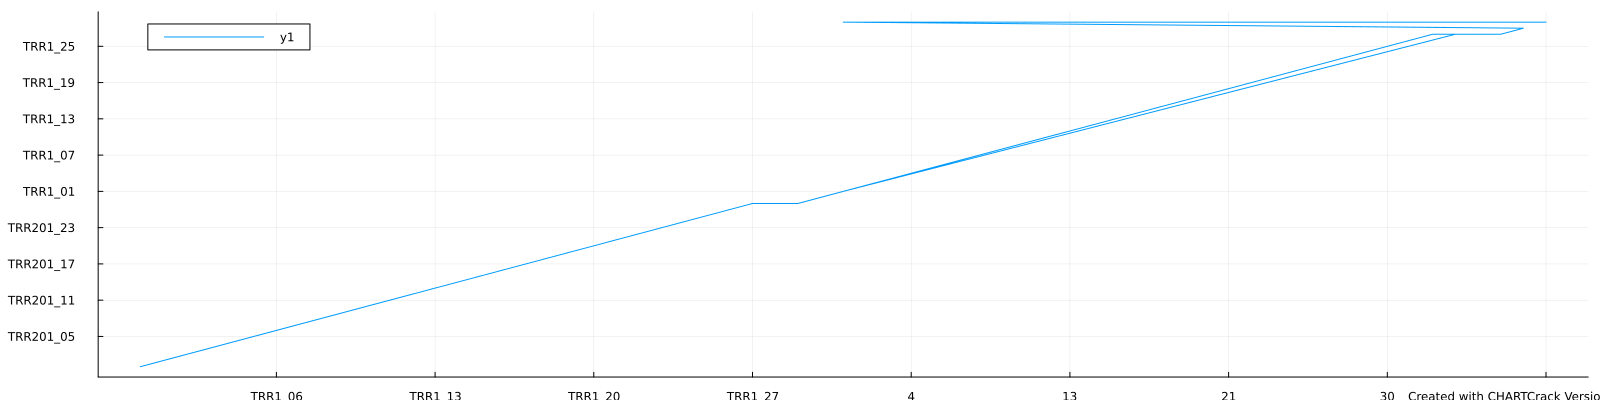

In [10]:
# using SavitzkyGolay
# using Plots
# from matplotlib import pyplot as plt
# import matplotlib as mpl
#sg = savitzky_golay(y::AbstractVector, window_size::Int, order::Int; deriv::Int=0, rate::Real=1.0)

#sg = savitzky_golay(df.NS, 3, 6) 

# print(len(df.Chainage))
# plt.subplots(figsize=(20,5))
# plt.plot(df.Chainage, df.Texture)
#plot(df.Chainage,[df.Texture,sg.y],size=(1600,400))
plot(df.Chainage,df.NS,size=(1600,400))
#plot!(df.Chainage, sg.y,lc=:red)

In [11]:

poly = curve_fit(Polynomial, df.Chainage, df.NS, 8)
df.basepoly = poly.(df.Chainage)

# the corrected values should be a flat plot centered on the mean by subtracting the poly from the actuals

df.corrected = df.NS - df.basepoly

plot(df.Chainage, df.NS)
plot!(df.Chainage, df.basepoly)
plot!(df.Chainage, df.corrected)
#plate_average = mean(plate.corrected)

LoadError: MethodError: no method matching zero(::Type{String})

[0mClosest candidates are:
[0m  zero([91m::Type{Union{}}[39m, Any...)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:310[24m[39m
[0m  zero([91m::Type{Gtk.GLib.GValue}[39m)
[0m[90m   @[39m [36mGtk[39m [90mC:\Users\rjaques\.julia\packages\Gtk\oo3cW\src\GLib\[39m[90m[4mgvalues.jl:10[24m[39m
[0m  zero([91m::Type{Dates.DateTime}[39m)
[0m[90m   @[39m [32mDates[39m [90mC:\Users\rjaques\AppData\Local\Programs\Julia-1.10.2\share\julia\stdlib\v1.10\Dates\src\[39m[90m[4mtypes.jl:438[24m[39m
[0m  ...


In [12]:
#plot(df.Chainage, df.corrected)
plot(df.corrected)

LoadError: ArgumentError: column name :corrected not found in the data frame

In [13]:
using Peaks
using DataFrames
using DataFramesMeta

In [14]:
pks = findmaxima(df.corrected) |> peakproms(;strict=true, min=10)

LoadError: ArgumentError: column name :corrected not found in the data frame

In [15]:
#val1 = findminima(df.corrected[(pks.indices[1]-3):pks.indices[1]])
#val2 = (findminima(df.corrected[(pks.indices[2]-3):pks.indices[2]])).heights
#val3 = (findminima(df.corrected[(pks.indices[3]-3):pks.indices[3]])).heights
findminima(df.corrected[(pks.indices[1]-4):pks.indices[1]])
#println("v1", val1, "v2",val2, "v3",val3)


LoadError: ArgumentError: column name :corrected not found in the data frame

In [16]:
#pkhts = findmaxima(df.corrected) |> peakheights(; min=10)

In [1]:
println("first plate height ", (pks.heights[1]-val1))
println("second plate height ",(pks.heights[2]-val2))
println("third plate height ", (pks.heights[3]-val3))

LoadError: UndefVarError: `pks` not defined

In [78]:
# plate_count =0

# for i in 1:nrow(lp_df)
#     if plate_count < 3
#         lower = lp_df[i,:heights]
#         higher = lp_df[i+1,:heights]
        
#         if ((higher - lower) > 5) 
#             plate_count = plate_count +1
#             println("plate ", plate_count, " height is ", higher-lower)             
#         end
#         #
#     end
# end